## Optimization Project

Team Members:

1.   Parthiv Borgohain (pb25347)
2.   Kai Zhang



In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline


In [29]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()   #x 28x28 matrix,each number is 1-256, y=1-10
x_train, x_test = x_train / 255.0, x_test / 255.0       #normalize each into a 0-1 scale

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


In [30]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))


xshape = x_train.shape[1:4]



In [31]:
xshape

(28, 28, 1)

# Convolutional **Neural Network**

After some trial and error, we got the following network which was giving us 99%+ validation accuracy pretty consistently.

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2, padding='same'),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2, padding='same'),
        tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2, padding='same'),
        tf.keras.layers.Dropout(0.10),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation=tf.nn.relu),
        tf.keras.layers.Dense(32,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(x_train,y_train,epochs=12,validation_split=0.2,batch_size=50) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
# Training the final model using the complete training dataset as we got >99% accuracy in our inital model fitting
model.fit(x_train,y_train,epochs=15,validation_split=0.2,batch_size=100)

Epoch 1/15
480/480 [==============================] - 49s 101ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0334 - val_accuracy: 0.9927
Epoch 2/15
480/480 [==============================] - 49s 103ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0389 - val_accuracy: 0.9924
Epoch 3/15
480/480 [==============================] - 49s 102ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0426 - val_accuracy: 0.9931
Epoch 4/15
480/480 [==============================] - 48s 101ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0390 - val_accuracy: 0.9927
Epoch 5/15
480/480 [==============================] - 48s 101ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0404 - val_accuracy: 0.9929
Epoch 6/15
480/480 [==============================] - 49s 102ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0443 - val_accuracy: 0.9915
Epoch 7/15
480/480 [==============================] - 50s 103ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0494 - val_ac

In [33]:
# predicted probabilities for test data
y_test_prob = model.predict(x_test)

# inal prediction
y_test_pred = y_test_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score
print('Accuracy on Test Dataset', round(100*accuracy_score(y_test, y_test_pred), 2), '%')


313/313 [==============================] - 4s 11ms/step
Accuracy on Test Dataset 99.28 %


In [34]:
pred_probs2 = model.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

313/313 [==============================] - 3s 11ms/step
0.9928


So, we have attained final **validation accuracy of about 99.30%** and **test accuracy of 99.28%**. This seems to be like a fairly robust model after lots of training.

In [ ]:
# Saving Model
model.save("final_CNN_model.h5")

In [35]:
# classification report summary
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



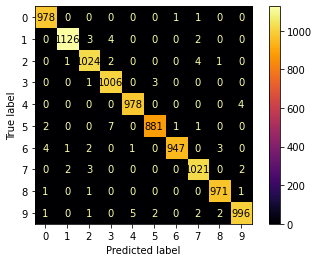

In [36]:
# confusion matrix to identify common misclassification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
d_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
d_cm.plot(cmap="inferno")
plt.show()

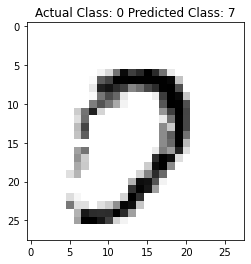

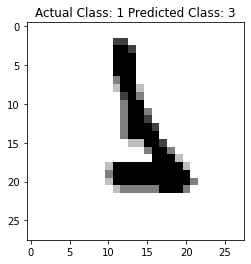

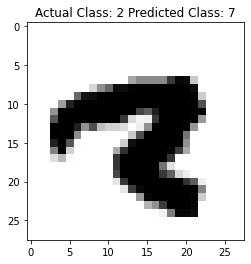

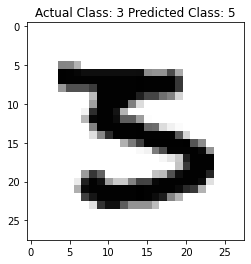

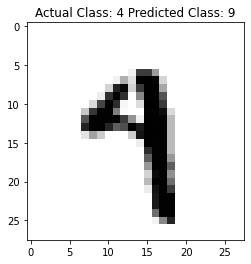

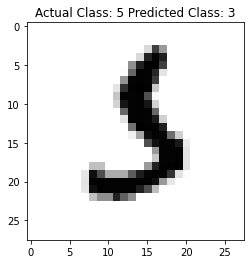

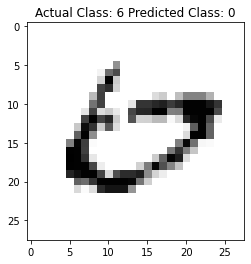

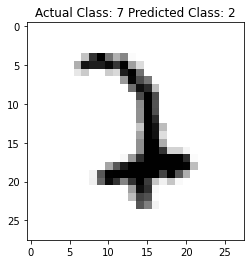

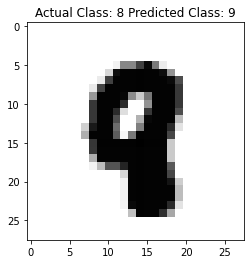

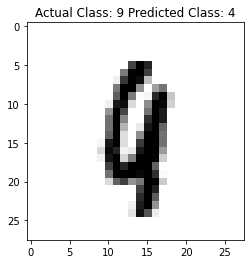

In [48]:
# getting most misclassified label for each number
most_misclassified = cm.argsort()[:, -2]

# combining actual and predicted into df
prediction = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

# visualizing common misclassification
for i in range(10):
  try:
    idx = prediction.query('y_test == {}'.format(i)).\
      query('y_test_pred == {}'.format(most_misclassified[i])).index.values[0]
  except:
    print('No misclassification for number: ', i)
    continue

  plt.title('Actual Class: {} Predicted Class: {}'.format(i, most_misclassified[i]))
  plt.imshow(1-x_test[idx, :, :, 0],cmap='gray')
  plt.show()